# Import Data

In [287]:
library(readr)
library(stringr) # 문자열 처리 패키지
library(doBy)
library(ggplot2)
library(scales)
library(RColorBrewer)
library(corrplot)
library(doBy)
library(dplyr) # 전처리
library(randomForest)
library(gridExtra)

In [288]:
setwd("C:/Users/yy/Desktop/2019-1st-ml-month-with-kakr")

In [289]:
train=read.csv("train.csv",stringsAsFactors=FALSE)
test=read.csv("test.csv",stringsAsFactors=FALSE)

In [290]:
head(train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [291]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [292]:
colSums(is.na(train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [293]:
colSums(is.na(test))

PassengerId      Pclass        Name         Sex         Age       SibSp 
          0           0           0           0          86           0 
      Parch      Ticket        Fare       Cabin    Embarked 
          0           0           1           0           0

In [294]:
summary(train)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [295]:
sapply(train, function(x) length(unique(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
        891           2           3         891           2          89 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          7           7         681         248         148           4

In [296]:
full=bind_rows(train,test)
head(full)
full=as.data.frame(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [297]:
missing_values <- full %>%      # 결측치 비율을 데이터프레임으로
  dplyr::summarize_all(funs(sum(is.na(.))/n()))

# tidyr::gather()함수를 이용하여 stack화 시킴 (설명변수들이 key로 지정한 변수에 나열되고, 결측값들이 value로 지정한 변수의 값으로)
missing_values <- tidyr::gather(missing_values,
                                key = "feature", value = "missing_pct")
missing_values

feature,missing_pct
PassengerId,0.0000000000
Survived,0.3193277311
Pclass,0.0000000000
Name,0.0000000000
Sex,0.0000000000
Age,0.2009167303
SibSp,0.0000000000
Parch,0.0000000000
Ticket,0.0000000000
Fare,0.0007639419


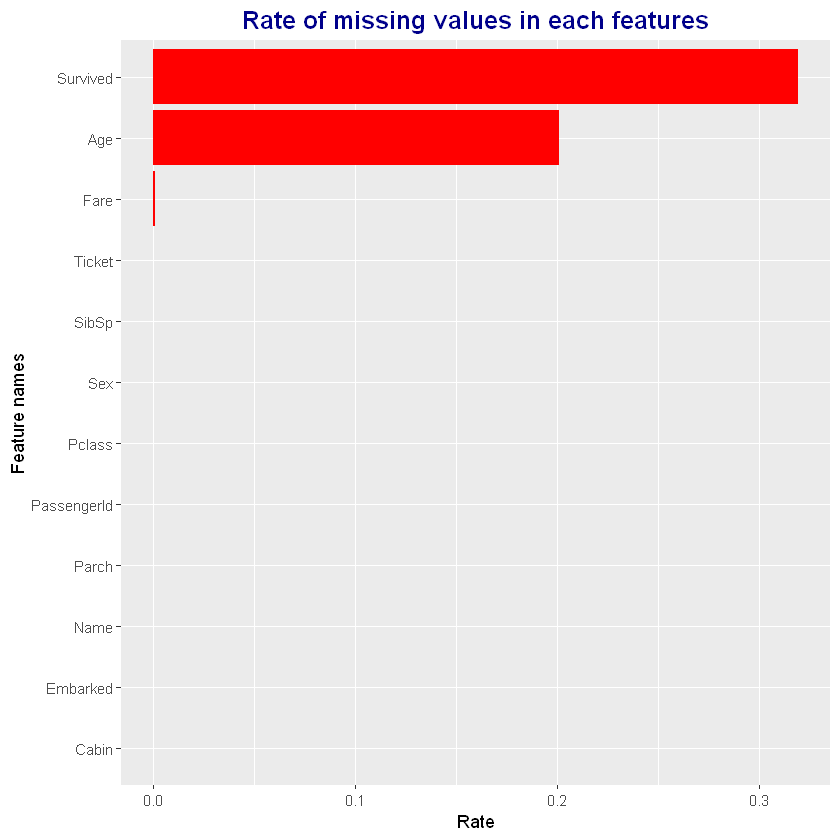

In [298]:
missing_values %>% 
  ggplot(aes(x = reorder(feature, missing_pct), y = missing_pct)) + # 정렬을 위한 reorder() 축지정
  geom_bar(stat = "identity", fill = "red") +  # bar plot 그리기 stat = 'identity' 데이터프레임 값을 그대로 이용하여 그리라는 옵션
  ggtitle("Rate of missing values in each features") +
  theme(plot.title = element_text(face = "bold",    # 글씨체 
                                  hjust = 0.5,      # Horizon(가로비율) = 0.5
                                  size = 15, color = "darkblue")) +
  labs(x = "Feature names", y = "Rate") +  # x,y축 제목 지정
  coord_flip() # Plot의 x, y축 변환 

# 결측값이 있는 변수로만 시각화
missing_values <- missing_values[missing_values$missing_pct > 0, ]

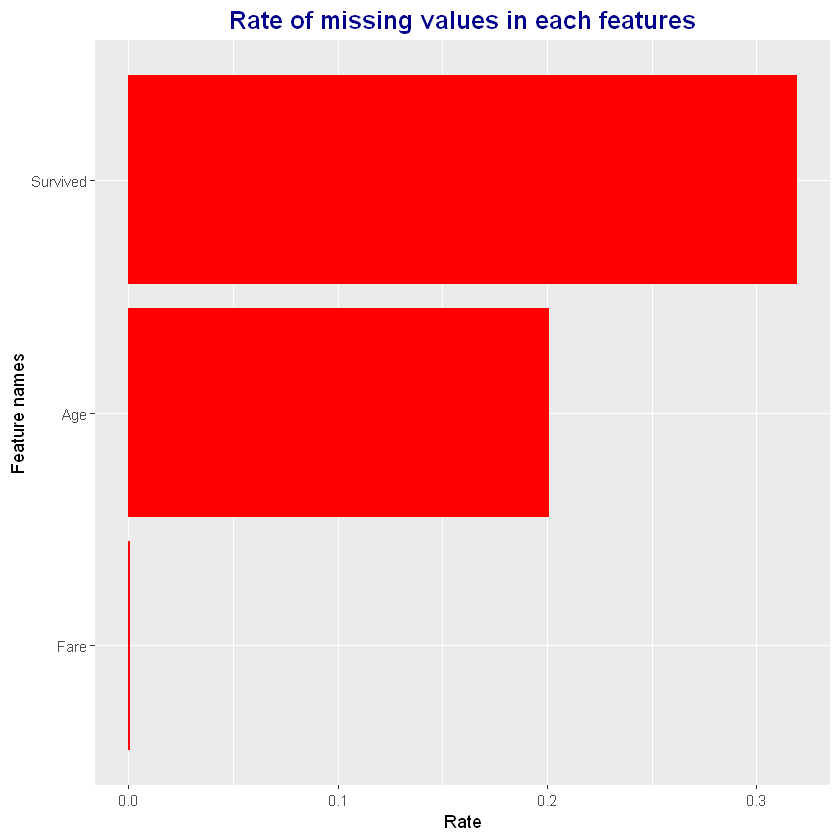

In [299]:
missing_values <- missing_values[missing_values$missing_pct > 0, ]

missing_values %>% 
  ggplot(aes(x = reorder(feature, missing_pct), y = missing_pct)) + # 정렬을 위한 reorder() 축지정
  geom_bar(stat = "identity", fill = "red") +  # bar plot 그리기 stat = 'identity' 데이터프레임 값을 그대로 이용하여 그리라는 옵션
  ggtitle("Rate of missing values in each features") +
  theme(plot.title = element_text(face = "bold",    # 글씨체 
                                  hjust = 0.5,      # Horizon(가로비율) = 0.5
                                  size = 15, color = "darkblue")) +
  labs(x = "Feature names", y = "Rate") +  # x,y축 제목 지정
  coord_flip() # Plot의 x, y축 변환 

# EDA: Sex

In [300]:
table(full$Sex)


female   male 
   466    843 

In [301]:
full %>% group_by(Survived, Sex) %>% summarise(freq = n())

Survived,Sex,freq
0,female,81
0,male,468
1,female,233
1,male,109
NA,female,152
NA,male,266


In [302]:
prop.table(table(full$Sex,full$Survived),1) #여자들이 생존할 확률이 높음

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

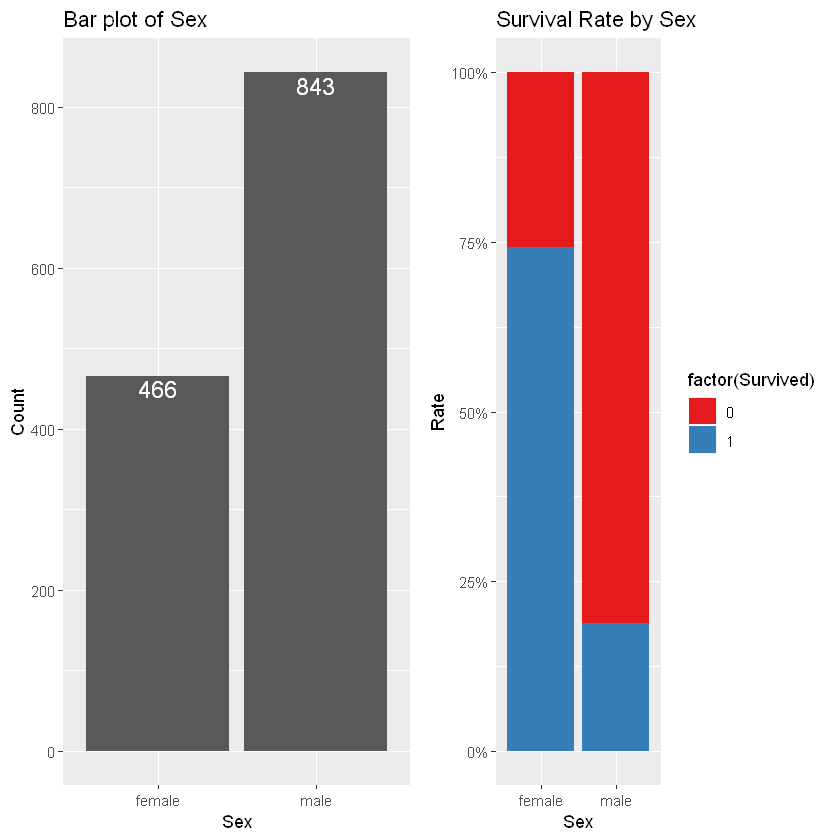

In [303]:
sex.p1 <- full %>% 
  dplyr::group_by(Sex) %>% 
  summarize(N = n()) %>% 
  ggplot(aes(Sex, N)) +
  geom_col() +
  geom_text(aes(label = N), size = 5, vjust = 1.2, color = "#FFFFFF") + 
  ggtitle("Bar plot of Sex") +
  labs(x = "Sex", y = "Count")

# 성별에 따른 생존률 막대그래프
sex.p2 <- full%>%
  filter(!is.na(Survived)) %>%
  ggplot(aes(factor(Sex), fill = factor(Survived))) +
  geom_bar(position = "fill") + 
  scale_y_continuous(labels = percent) +
  scale_fill_brewer(palette = "Set1") +  # palette에 어떤색 넣을지 지정
   # 일정한 간격으로 x축과 y축 설정 : scale_x_continuous(breaks=seq())
  # 분석가 마음대로 x축과 y축 설정 : scale_x_continuous(breaks=c())
  ggtitle("Survival Rate by Sex") + 
  labs(x = "Sex", y = "Rate")

grid.arrange(sex.p1,sex.p2,ncol=2)

# EDA: Pclass

In [304]:
table(full$Pclass)


  1   2   3 
323 277 709 

In [305]:
full %>% group_by(Survived, Pclass) %>% summarise(freq = n())

Survived,Pclass,freq
0,1,80
0,2,97
0,3,372
1,1,136
1,2,87
1,3,119
NA,1,107
NA,2,93
NA,3,218


In [306]:
prop.table(table(full$Pclass,full$Survived),1) #사회적 지위가 높을수록 생존할 확률이 높음

   
            0         1
  1 0.3703704 0.6296296
  2 0.5271739 0.4728261
  3 0.7576375 0.2423625

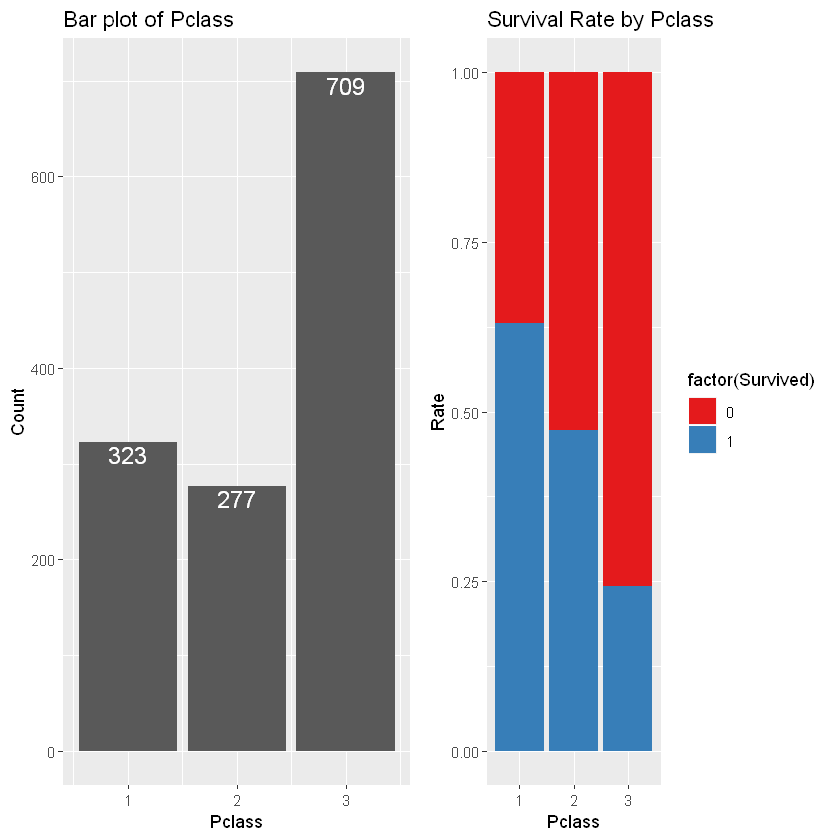

In [307]:
pclass.p1 <- full %>% 
  dplyr::group_by(Pclass) %>% 
  summarize(N = n()) %>% 
  ggplot(aes(Pclass, N)) +
  geom_col() +
  geom_text(aes(label = N), size = 5, vjust = 1.2, color = "#FFFFFF") + 
  ggtitle("Bar plot of Pclass") +
  labs(x = "Pclass", y = "Count")

# Pclass에 따른 생존률 막대그래프
pclass.p2 <- full%>%
  filter(!is.na(Survived)) %>%
  ggplot(aes(factor(Pclass), fill = factor(Survived))) +
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Set1") +  
  ggtitle("Survival Rate by Pclass") + 
  labs(x = "Pclass", y = "Rate")

grid.arrange(pclass.p1,pclass.p2,ncol=2)

# EDA: SibSp

In [308]:
table(train$SibSp)


  0   1   2   3   4   5   8 
608 209  28  16  18   5   7 

In [309]:
train %>% group_by(Survived, SibSp) %>% summarise(freq = n())

Survived,SibSp,freq
0,0,398
0,1,97
0,2,15
0,3,12
0,4,15
0,5,5
0,8,7
1,0,210
1,1,112
1,2,13


In [310]:
prop.table(table(train$SibSp,train$Survived),1) #배우자,형제자매가 많을수록 생존률이 떨어짐

   
            0         1
  0 0.6546053 0.3453947
  1 0.4641148 0.5358852
  2 0.5357143 0.4642857
  3 0.7500000 0.2500000
  4 0.8333333 0.1666667
  5 1.0000000 0.0000000
  8 1.0000000 0.0000000

# EDA: Parch

In [311]:
table(full$Parch)


   0    1    2    3    4    5    6    9 
1002  170  113    8    6    6    2    2 

In [312]:
full %>% group_by(Survived, Parch,) %>% summarise(freq = n())

Survived,Parch,freq
0,0,445
0,1,53
0,2,40
0,3,2
0,4,4
0,5,4
0,6,1
1,0,233
1,1,65
1,2,40


In [313]:
prop.table(table(full$Parch,full$Survived),1) #부모와 자녀를 1~3명 정도 동승했을 경우 생존률이 높음 

   
            0         1
  0 0.6563422 0.3436578
  1 0.4491525 0.5508475
  2 0.5000000 0.5000000
  3 0.4000000 0.6000000
  4 1.0000000 0.0000000
  5 0.8000000 0.2000000
  6 1.0000000 0.0000000
  9                    

# EDA: Embarked

In [314]:
table(full$Embarked) #결측값 2개


      C   Q   S 
  2 270 123 914 

In [315]:
full %>% group_by(Survived, Embarked) %>% summarise(freq = n())

Survived,Embarked,freq
0,C,75
0,Q,47
0,S,427
1,,2
1,C,93
1,Q,30
1,S,217
NA,C,102
NA,Q,46
NA,S,270


In [316]:
prop.table(table(full$Embarked,full$Survived),1) #유일하게 C에서 탑승한 인원들만 생존률이 더 높다

   
            0         1
    0.0000000 1.0000000
  C 0.4464286 0.5535714
  Q 0.6103896 0.3896104
  S 0.6630435 0.3369565

# Feature engineering

In [317]:
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Name을 보면  , Mr.와 같은 형태로 ,(공백)Mr.과 같은 형태로 구성되있다는 것을 확인

- Mr : 0  
- Miss : 1  
- Mrs: 2  
- Others: 3

In [318]:
library(stringr)
full$Title <- gsub('(.*,)|(\\..*)','', full$Name) 
# ','앞에 .*(모든문자)를 지워주세요
# \\.(마침표) 뒤에 .*(모든문자)를 지워주세요

In [319]:
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,Mr
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,Mr


In [320]:
full%>% count(Title)  %>% arrange(desc(n))

Title,n
Mr,757
Miss,260
Mrs,197
Master,61
Dr,8
Rev,8
Col,4
Major,2
Mlle,2
Ms,2


In [321]:
full$Title <- ifelse(full$Title == " Mr", 0, ifelse(full$Title == " Miss", 1, ifelse(full$Title == " Mrs", 2, 3)))

full$Title <- as.factor(full$Title)

In [322]:
head(full)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0


In [323]:
#Name 변수 제거
full <- full[, -4]

성별 범주화

In [324]:
full$Sex <- ifelse(full$Sex == "male" ,0 , 1)

full$Sex <- as.factor(full$Sex)

Fsize(가족의 수) 파생변수 생성 및 범주화

In [325]:
full$Fsize <- full$SibSp + full$Parch + 1

In [326]:
table(full$Fsize)


  1   2   3   4   5   6   7   8  11 
790 235 159  43  22  25  16   8  11 

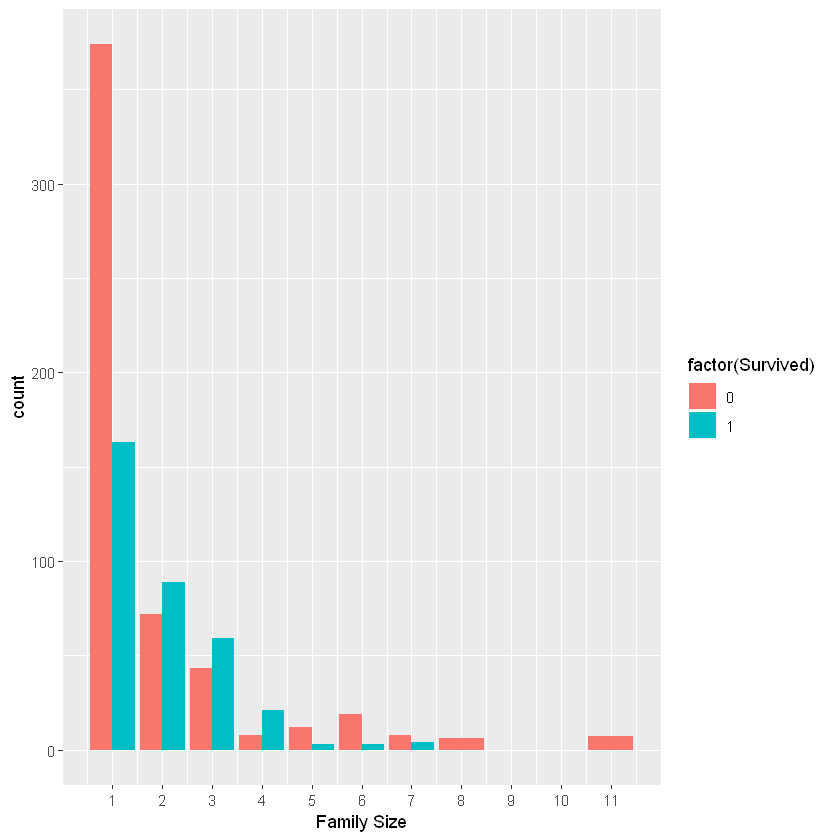

In [327]:
ggplot(full[1:891,], aes(x = Fsize, fill = factor(Survived))) +
  geom_bar(stat='count', position='dodge') +
  scale_x_continuous(breaks=c(1:11)) +
  labs(x = 'Family Size') 
# 가족의 수가 4명을 초과하면 생존이 매우 적어지는 것을 확인하였다.

In [328]:
full$Family[full$Fsize == 1] <- 'single'
full$Family[full$Fsize < 5 & full$Fsize > 1] <- 'small'
full$Family[full$Fsize > 4] <- 'large'

full$Family <- as.factor(full$Family)

In [329]:
table(full$Family)


 large single  small 
    82    790    437 

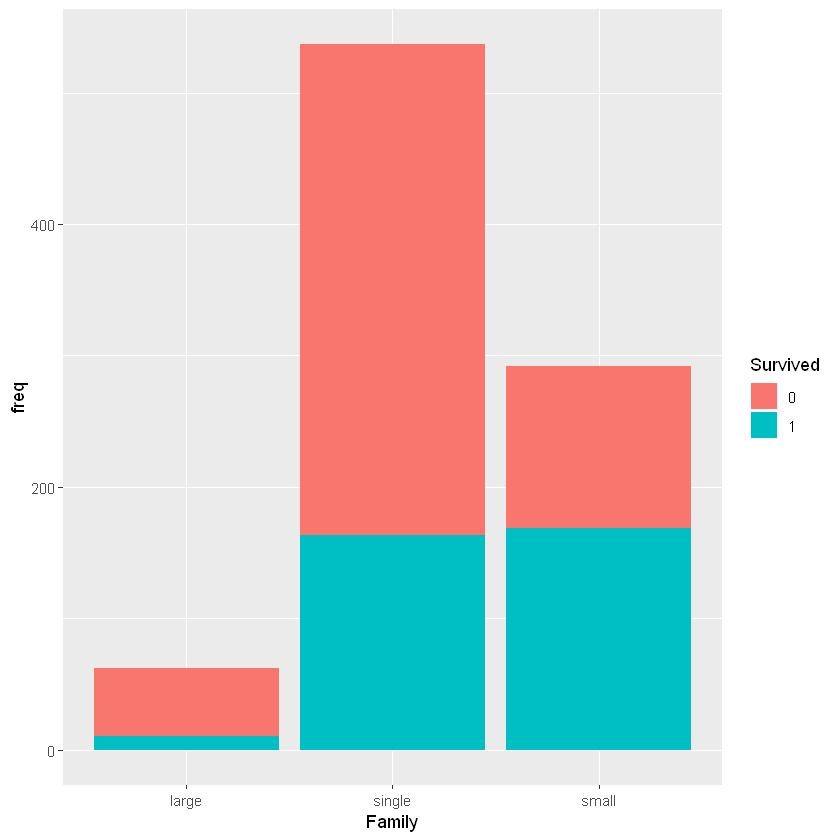

In [330]:
ggplot(full[1:891,], aes(x = Family, fill = factor(Survived))) +
  geom_bar() +
  labs(fill = 'Survived', x="Family", y="freq")

In [331]:
#SibSp, Parch, Fsize 변수 제거
full=  full  %>% select(-6,-7,-13)

In [332]:
head(full)

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Family
1,0,3,0,22,A/5 21171,7.2500,,S,0,small
2,1,1,1,38,PC 17599,71.2833,C85,C,2,small
3,1,3,1,26,STON/O2. 3101282,7.9250,,S,1,single
4,1,1,1,35,113803,53.1000,C123,S,2,small
5,0,3,0,35,373450,8.0500,,S,0,single
6,0,3,0,NA,330877,8.4583,,Q,0,single


Cabin(객실정보)에 따른 파생변수 생성

In [333]:
full$Cabin[1:28]

[1] ""            "C85"         ""            "C123"        ""           
 [6] ""            "E46"         ""            ""            ""           
[11] "G6"          "C103"        ""            ""            ""           
[16] ""            ""            ""            ""            ""           
[21] ""            "D56"         ""            "A6"          ""           
[26] ""            ""            "C23 C25 C27"

In [334]:
strsplit(full$Cabin[2], NULL)[[1]]

[1] "C" "8" "5"

In [335]:
full$Deck<-factor(sapply(full$Cabin, function(x) strsplit(x, NULL)[[1]][1]))

In [336]:
#Cabin 변수 제거
full=full[,-8]

In [337]:
head(full)

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
1,0,3,0,22,A/5 21171,7.2500,S,0,small,NA
2,1,1,1,38,PC 17599,71.2833,C,2,small,C
3,1,3,1,26,STON/O2. 3101282,7.9250,S,1,single,NA
4,1,1,1,35,113803,53.1000,S,2,small,C
5,0,3,0,35,373450,8.0500,S,0,single,NA
6,0,3,0,NA,330877,8.4583,Q,0,single,NA


In [338]:
glimpse(full)

Observations: 1,309
Variables: 11
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, ...
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0...
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3...
$ Sex         <fct> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1...
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 1...
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", ...
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.86...
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", ...
$ Title       <fct> 0, 2, 1, 2, 0, 0, 0, 3, 2, 2, 1, 1, 0, 0, 1, 2, 3, 0, 2...
$ Family      <fct> small, small, single, small, single, single, single, la...
$ Deck        <fct> NA, C, NA, C, NA, NA, E, NA, NA, NA, G, C, NA, NA, NA, ...


In [339]:
levels(full$Deck)

[1] "A" "B" "C" "D" "E" "F" "G" "T"

Warning message in `[<-.factor`(`*tmp*`, is.na(full$Deck), value = "U"):
"invalid factor level, NA generated"

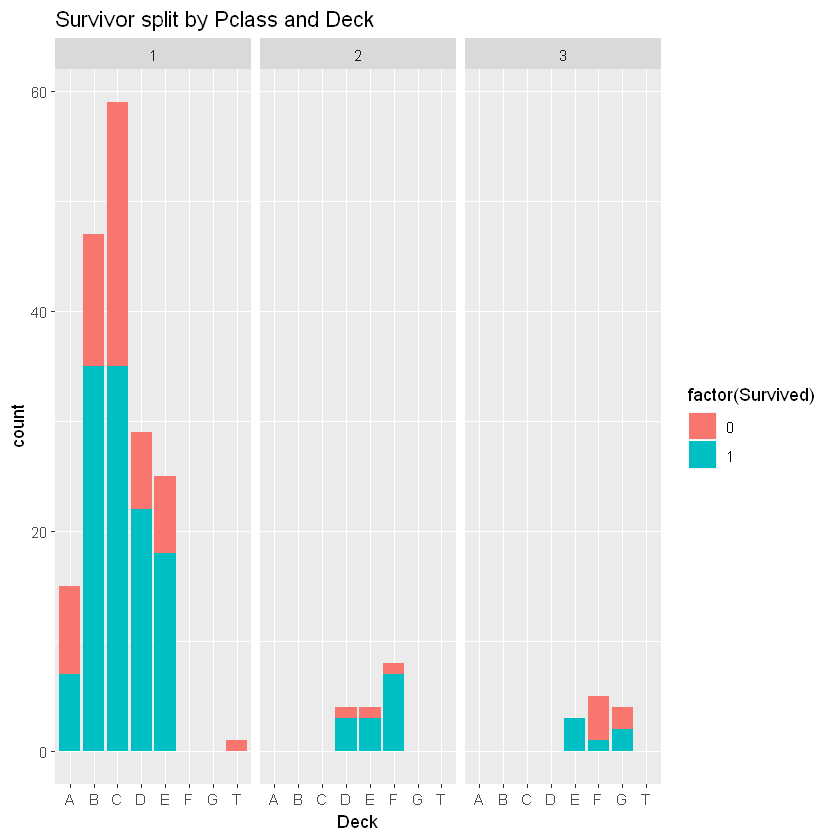

In [340]:
full$Deck[is.na(full$Deck)] <- "U"

cabin=full %>%filter(!is.na(full$Survived)& full$Deck!='U')

ggplot(cabin,aes(x=Deck, fill=factor(Survived), na.rm=TRUE)) +
        geom_bar(stat='count') +
        facet_grid(.~Pclass) +
        labs(title="Survivor split by Pclass and Deck")

In [341]:
prop.table(table(full$Survived[(!is.na(full$Survived)&full$Deck!='U')], full$Deck[(!is.na(full$Survived)&full$Deck!='U')]),2)*100

   
            A         B         C         D         E         F         G
  0  53.33333  25.53191  40.67797  24.24242  25.00000  38.46154  50.00000
  1  46.66667  74.46809  59.32203  75.75758  75.00000  61.53846  50.00000
   
            T
  0 100.00000
  1   0.00000

Ticket 파생변수 생성 및 범주화

In [342]:
length(unique(full$Ticket))

[1] 929

In [343]:
head(full$Ticket)

[1] "A/5 21171"        "PC 17599"         "STON/O2. 3101282" "113803"          
[5] "373450"           "330877"

In [344]:
full  %>%  arrange(Ticket) #같은 티켓인데도 불구하고 Family가 single, 친구등과 같이 온것으로 유추

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck
258,1,1,1,30,110152,86.5000,S,1,single,B
505,1,1,1,16,110152,86.5000,S,1,single,B
760,1,1,1,33,110152,86.5000,S,3,single,B
263,0,1,0,52,110413,79.6500,S,0,small,E
559,1,1,1,39,110413,79.6500,S,2,small,E
586,1,1,1,18,110413,79.6500,S,1,small,E
111,0,1,0,47,110465,52.0000,S,0,single,C
476,0,1,0,NA,110465,52.0000,S,0,single,A
1227,NA,1,0,30,110469,26.0000,S,0,single,C
1050,NA,1,0,42,110489,26.5500,S,0,single,D


In [345]:
full$TravelGroup <- NA

In [346]:
full <- (transform(full, TravelGroup = match(Ticket, unique(Ticket))))

In [347]:
full <- full %>% 
            group_by(TravelGroup) %>% 
            mutate(GroupSize = n()) %>%
            ungroup()

In [348]:
full  %>% arrange(Ticket)

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck,TravelGroup,GroupSize
258,1,1,1,30,110152,86.5000,S,1,single,B,231,3
505,1,1,1,16,110152,86.5000,S,1,single,B,231,3
760,1,1,1,33,110152,86.5000,S,3,single,B,231,3
263,0,1,0,52,110413,79.6500,S,0,small,E,235,3
559,1,1,1,39,110413,79.6500,S,2,small,E,235,3
586,1,1,1,18,110413,79.6500,S,1,small,E,235,3
111,0,1,0,47,110465,52.0000,S,0,single,C,108,2
476,0,1,0,NA,110465,52.0000,S,0,single,A,108,2
1227,NA,1,0,30,110469,26.0000,S,0,single,C,889,1
1050,NA,1,0,42,110489,26.5500,S,0,single,D,783,1


In [349]:
full  %>% filter(GroupSize==1,Family!="single") # 50개

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck,TravelGroup,GroupSize
1,0,3,0,22,A/5 21171,7.2500,S,0,small,NA,1,1
41,0,3,1,40,7546,9.4750,S,2,small,NA,40,1
69,1,3,1,17,3101281,7.9250,S,1,large,NA,68,1
70,0,3,0,26,315151,8.6625,S,0,small,NA,69,1
105,0,3,0,37,3101276,7.9250,S,0,small,NA,102,1
114,0,3,1,20,4136,9.8250,S,1,small,NA,111,1
137,1,1,1,19,11752,26.2833,S,1,small,D,128,1
176,0,3,0,18,350404,7.8542,S,0,small,NA,160,1
193,1,3,1,19,350046,7.8542,S,1,small,NA,175,1
198,0,3,0,42,4579,8.4042,S,0,small,NA,178,1


In [350]:
full$GroupSize=as.factor(full$GroupSize)

# Missing Value

In [351]:
colSums(is.na(full))

PassengerId    Survived      Pclass         Sex         Age      Ticket 
          0         418           0           0         263           0 
       Fare    Embarked       Title      Family        Deck TravelGroup 
          1           0           0           0        1014           0 
  GroupSize 
          0

Embarked(탑승항구) 결측치 처리

In [352]:
full  %>% filter(Embarked=="") #두개의 관측치 모두 Fare가 80이고, Pclass가 1임

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck,TravelGroup,GroupSize
62,1,1,1,38,113572,80,,1,single,B,61,2
830,1,1,1,62,113572,80,,2,single,B,61,2


In [353]:
embark_fare= full  %>% filter(Embarked!="")

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

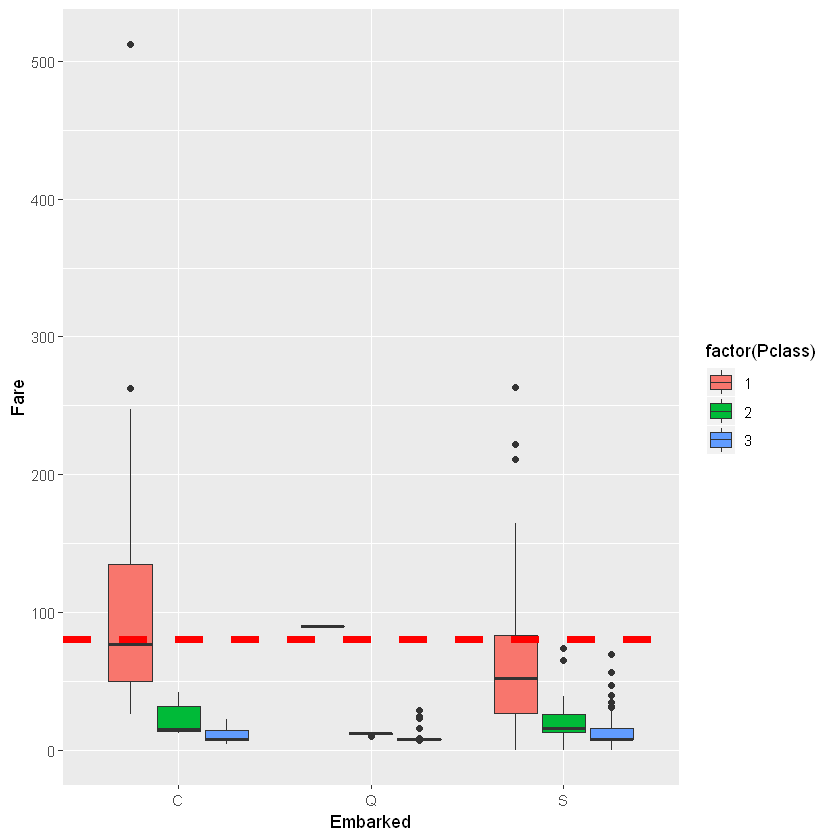

In [354]:
ggplot(embark_fare, aes(x = Embarked, y = Fare, fill = factor(Pclass))) +
  geom_boxplot() +
  geom_hline(aes(yintercept=80), 
    colour='red', linetype='dashed', lwd=2) +
  scale_y_continuous()

#fare가 80달러이면서 Pclass가 1인 승객들의 Embark는 C임

In [355]:
full$Embarked[c(62, 830)] <- 'C'

full[c(62, 830),] 

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck,TravelGroup,GroupSize
62,1,1,1,38,113572,80,C,1,single,B,61,2
830,1,1,1,62,113572,80,C,2,single,B,61,2


Fare(요금) 결측치 처리

In [356]:
full  %>% filter(is.na(full$Fare)) #Pclasss가 3이고, Embarked는 S임

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck,TravelGroup,GroupSize
1044,NA,3,0,60.5,3701,NA,S,0,single,NA,779,1


In [357]:
full$Fare[1044] <- median(full[full$Pclass == '3' & full$Embarked == 'S', ]$Fare, na.rm = TRUE) #중앙값으로 결측치 처리

In [358]:
full[1044,]

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family,Deck,TravelGroup,GroupSize
1044,NA,3,0,60.5,3701,8.05,S,0,single,NA,779,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 17 rows containing non-finite values (stat_bin)."

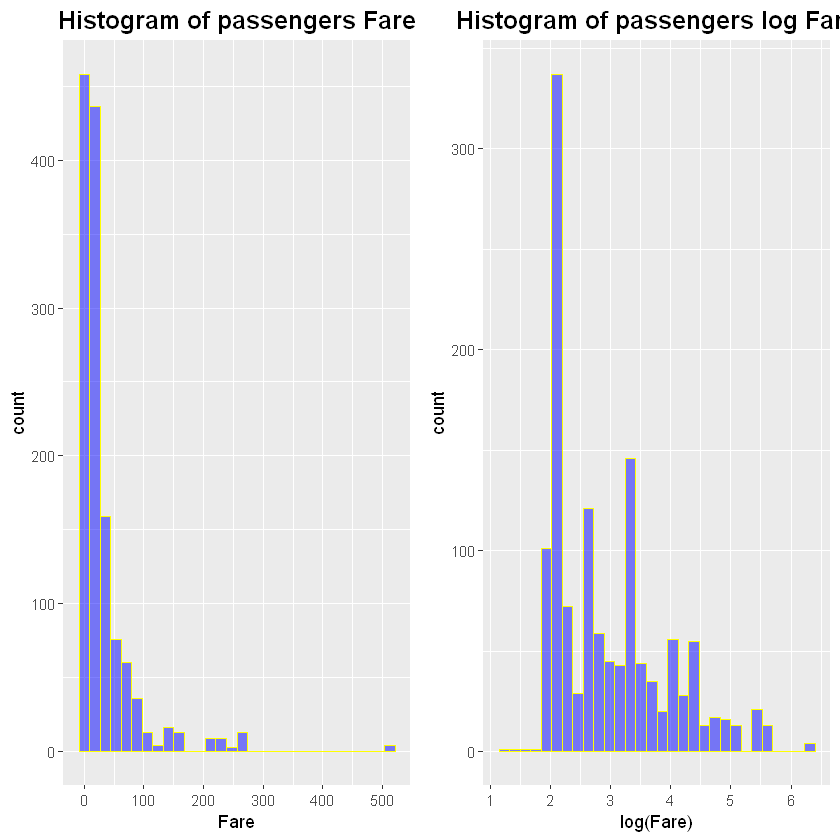

In [359]:
Fare.p1 <- full %>%
  ggplot(aes(Fare)) + 
  geom_histogram(col    = "yellow",
                 fill   = "blue", 
                 alpha  = .5) +
  ggtitle("Histogram of passengers Fare") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15))

Fare.p2 <- full %>%
  ggplot(aes(log(Fare))) + 
  geom_histogram(col    = "yellow",
                 fill   = "blue", 
                 alpha  = .5) +
  ggtitle("Histogram of passengers log Fare") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 15))

grid.arrange(Fare.p1,Fare.p2,ncol=2)

Age(나이) 결측치 처리

In [360]:
full=as.data.frame(full)

In [361]:
summaryBy(Age ~ Title, data=full, FUN=c(mean, sd, median), na.rm=TRUE)

Title,Age.mean,Age.sd,Age.median
0,32.25215,12.42209,29.0
1,21.77424,12.24908,22.0
2,36.99412,12.90177,35.5
3,19.47741,19.89266,9.0


In [362]:
# Title별 Median Age를 통한 결측값 처리
full$Age <- ifelse((is.na(full$Age) & full$Title == 0), 29, full$Age)
full$Age <- ifelse((is.na(full$Age) & full$Title == 1), 22, full$Age)
full$Age <- ifelse((is.na(full$Age) & full$Title == 2), 35, full$Age)
full$Age <- ifelse((is.na(full$Age) & full$Title == 3), 9, full$Age)

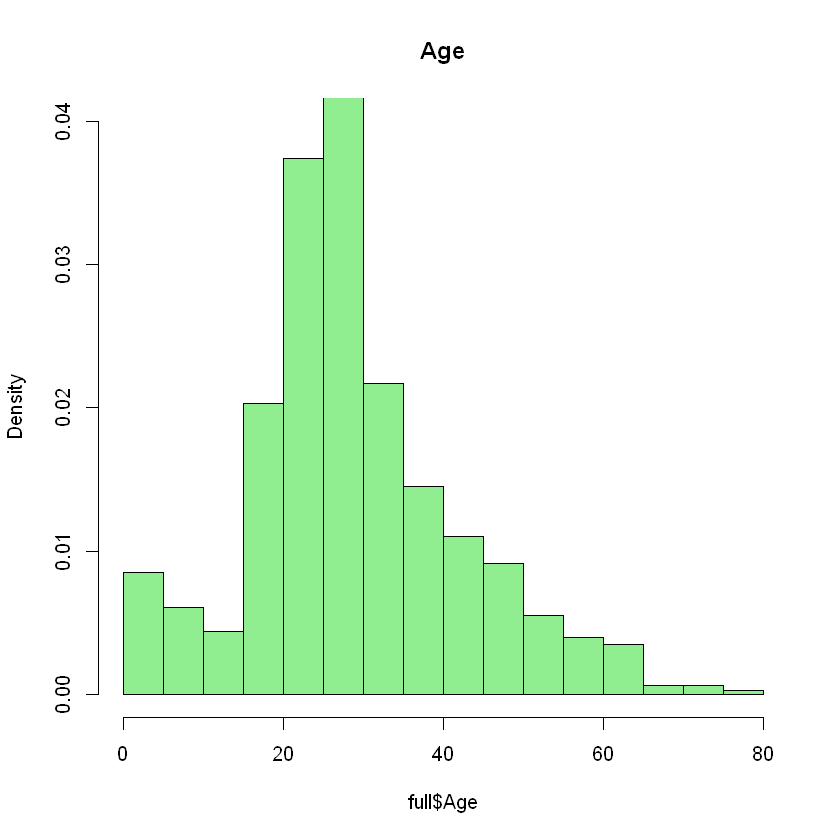

In [363]:
hist(full$Age, freq=F, main='Age',col='lightgreen', ylim=c(0,0.04))

-child: 18세 이하

-adult: 19세 이상 64세 이하

-senior: 65세 이상

In [364]:
full$Age <- ifelse(full$Age <= 18, "child",
                    ifelse(full$Age > 18 & full$Age <= 64, "adult","senior"))

In [365]:
table(full$Age)


 adult  child senior 
  1093    203     13 

# Predict

In [366]:
factor_vars <- c('PassengerId','Survived','Pclass','Age','Embarked')

full[factor_vars] <- lapply(full[factor_vars], function(x) as.factor(x))

In [367]:
str(train)
colSums(is.na(train))
sum(is.finite(train))

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

ERROR: Error in is.finite(train): 유형 'list'에 대한 기본메소드는 구현되지 않았습니다


In [368]:
train <- full[1:891,]
test <- full[892:1309,]

In [369]:
set.seed(123)

rf_model <- randomForest(factor(Survived) ~ Pclass + Sex + Age + Fare+
                                            Embarked + Title + 
                                            Family+GroupSize,
                                            data = train)

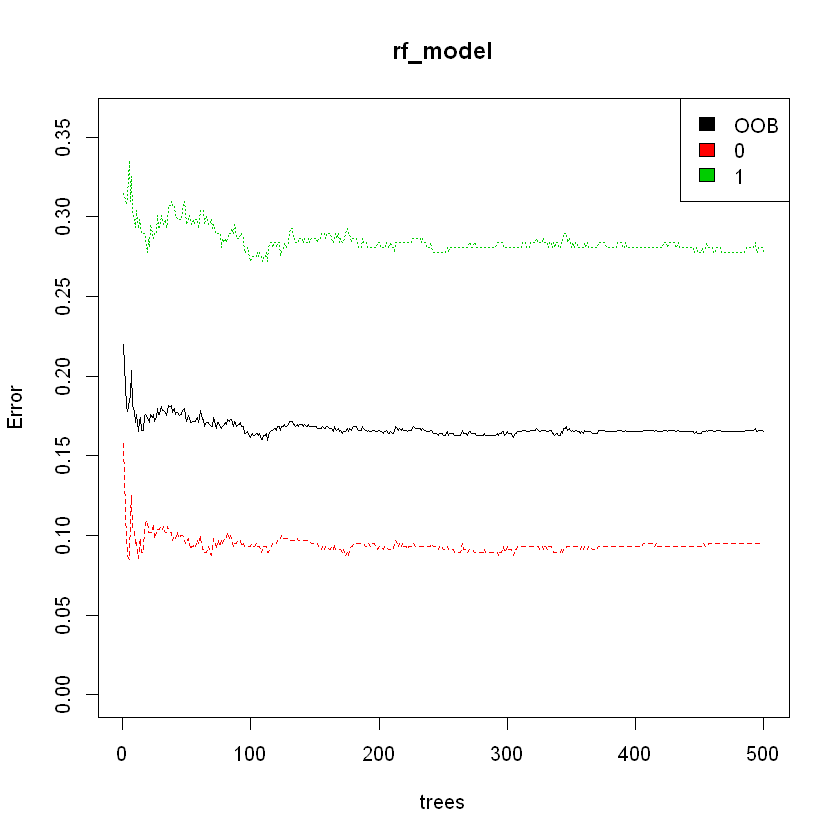

In [370]:
plot(rf_model, ylim=c(0,0.36))
legend('topright', colnames(rf_model$err.rate), col=1:3, fill=1:3)

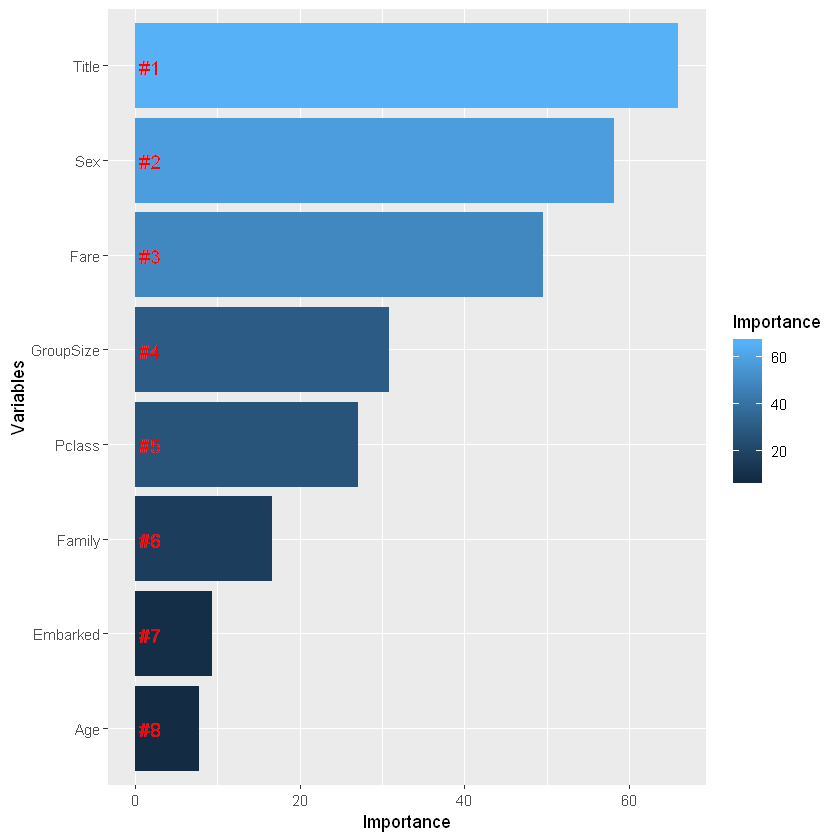

In [371]:
#변수 중요도
importance    <- importance(rf_model)
varImportance <- data.frame(Variables = row.names(importance), 
                            Importance = round(importance[ ,'MeanDecreaseGini'],2))

rankImportance <- varImportance %>%
  mutate(Rank = paste0('#',dense_rank(desc(Importance))))

ggplot(rankImportance, aes(x = reorder(Variables, Importance), 
    y = Importance, fill = Importance)) +
  geom_bar(stat='identity') + 
  geom_text(aes(x = Variables, y = 0.5, label = Rank),
    hjust=0, vjust=0.55, size = 4, colour = 'red') +
  labs(x = 'Variables') +
  coord_flip()

In [372]:
prediction <- predict(rf_model, test)

solution <- data.frame(PassengerID = test$PassengerId, Survived = prediction)

write.csv(solution, file = 'rf_mod_Solution.csv', row.names = F)

In [373]:
rf_model


Call:
 randomForest(formula = factor(Survived) ~ Pclass + Sex + Age +      Fare + Embarked + Title + Family + GroupSize, data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.5%
Confusion matrix:
    0   1 class.error
0 497  52  0.09471767
1  95 247  0.27777778

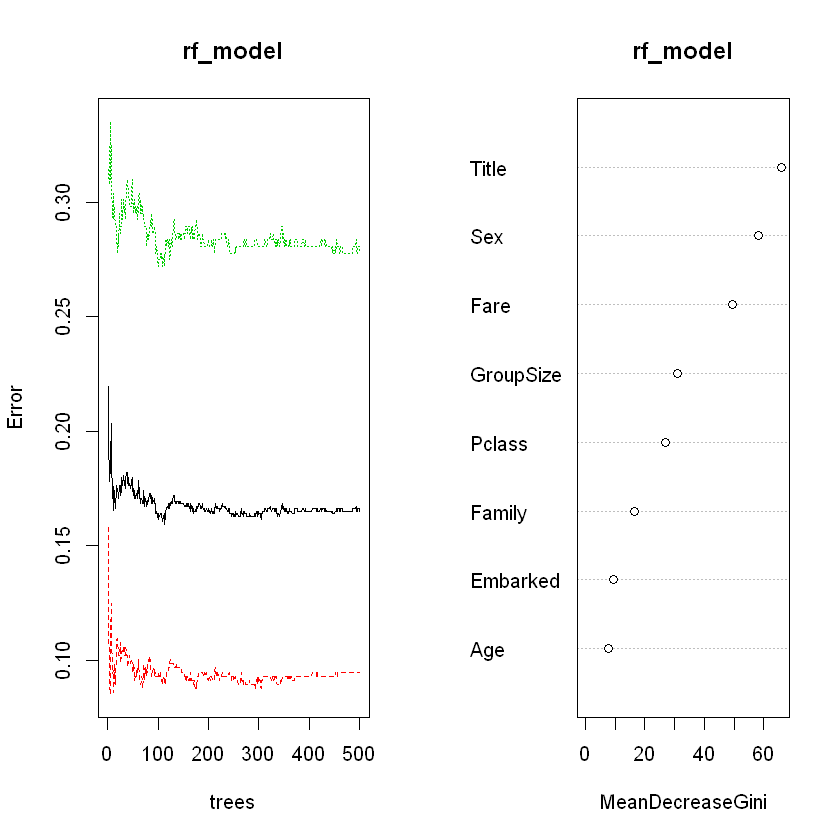

In [374]:
opar <- par(mfrow=c(1,2))
plot(rf_model)
varImpPlot(rf_model)